<a href="https://colab.research.google.com/github/kozen88/Diabetes_Onward_Monitor/blob/main/diabetes_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsione della progressione del diabete in pazienti a rischio

Il dataset diabetes di scikit-learn contiene degli esempi clinici di pazienti affetti da diabete. È un dataset di regressione il cui target è una misura quantitativa che rappresenta la progressione della malattia.<br>
<br>

Si può caricare mediante l’import seguente: from sklearn.datasets import load_diabetes e poi usando la funzione load_diabetes per ottenere i vari dati (maggiori dettagli nella documentazione ufficiale: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html).<br>
<br>

Le colonne del dataset sono le seguenti:<br>
1. age: età
2. sex: genere di sesso
3. bmi: indice di massa corporea
4. bp: pressione sanguigna media
5. s1: colesterolo sierico totale
6. s2: lipoproteine ​​a bassa densità
7. s3: lipoproteine ​​ad alta densità
8. s4: colesterolo totale/HDL
9. s5: trigliceridi
10. s6: glicemia<br>
<br>

--------

**Devi realizzare un modello di regressione che, partendo da questo dataset, provi a prevedere il target.**<br>

**Spiega i vari passaggi della realizzazione del modello e di selezione delle variabili e commenta i risultati ottenuti.**


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes

Lets start with importing the date and exctract a dataframe pandas which contain the dataset with the feauters and target.

In [2]:
# getting a bunch object similar to a dictonary in python
diabetes_bunch = load_diabetes(as_frame=True, scaled=False)

In [3]:
# take a look at the type
print(type(diabetes_bunch))

<class 'sklearn.utils._bunch.Bunch'>


In [4]:
help('sklearn.utils._bunch.Bunch')

Help on class Bunch in sklearn.utils._bunch:

sklearn.utils._bunch.Bunch = class Bunch(builtins.dict)
 |  sklearn.utils._bunch.Bunch(**kwargs)
 |  
 |  Container object exposing keys as attributes.
 |  
 |  Bunch objects are sometimes used as an output for functions and methods.
 |  They extend dictionaries by enabling values to be accessed by key,
 |  `bunch["value_key"]`, or by an attribute, `bunch.value_key`.
 |  
 |  Examples
 |  --------
 |  >>> from sklearn.utils import Bunch
 |  >>> b = Bunch(a=1, b=2)
 |  >>> b['b']
 |  2
 |  >>> b.b
 |  2
 |  >>> b.a = 3
 |  >>> b['a']
 |  3
 |  >>> b.c = 6
 |  >>> b['c']
 |  6
 |  
 |  Method resolution order:
 |      Bunch
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __dir__(self)
 |      Default dir() implementation.
 |  
 |  __getattr__(self, key)
 |  
 |  __init__(self, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __setattr__(self, key, value)
 |      Im

In [11]:
# extracction of the dataframe wanted
df = diabetes_bunch.data

In [12]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


In [13]:
print(f"The dataset is composed of {df.shape[0]} raws and {df.shape[1]} columns.")

The dataset is composed of 442 raws and 10 columns.


In [7]:
# lets save the dataset we have extract into a file for future use
df.to_csv("diabetes.csv", index=False)

df.to_excel("diabetes.xlsx", index=False)

In [33]:
# Lets change the name of same columns to be more significant
new_name = ['colesterol', 'LDL', 'HDL', 'TG', 'CF-HDL', 'glucose']
df = df.rename(columns={'s1': new_name[0], 's2': new_name[1], 's3': new_name[2], 's4': new_name[3], 's5': new_name[4], 's6': new_name[5]})

In [34]:
df

,age,sex,bmi,bp,colesterol,LDL,HDL,TG,CF-HDL,glucose
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


## Basic Data exploration
We are going to perform a bunch of operation which allow us tto take a look at the data types and also to consider how the data are distributed and how much ours features are correlated to each other.

In [35]:
# statistics summarization
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,48.518100,13.109028,19.0000,38.2500,50.00000,59.0000,79.000
sex,442.0,1.468326,0.499561,1.0000,1.0000,1.00000,2.0000,2.000
bmi,442.0,26.375792,4.418122,18.0000,23.2000,25.70000,29.2750,42.200
bp,442.0,94.647014,13.831283,62.0000,84.0000,93.00000,105.0000,133.000
colesterol,442.0,189.140271,34.608052,97.0000,164.2500,186.00000,209.7500,301.000
LDL,442.0,115.439140,30.413081,41.6000,96.0500,113.00000,134.5000,242.400
HDL,442.0,49.788462,12.934202,22.0000,40.2500,48.00000,57.7500,99.000
TG,442.0,4.070249,1.290450,2.0000,3.0000,4.00000,5.0000,9.090
CF-HDL,442.0,4.641411,0.522391,3.2581,4.2767,4.62005,4.9972,6.107
glucose,442.0,91.260181,11.496335,58.0000,83.2500,91.00000,98.0000,124.000


In [36]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         442 non-null    float64
 1   sex         442 non-null    float64
 2   bmi         442 non-null    float64
 3   bp          442 non-null    float64
 4   colesterol  442 non-null    float64
 5   LDL         442 non-null    float64
 6   HDL         442 non-null    float64
 7   TG          442 non-null    float64
 8   CF-HDL      442 non-null    float64
 9   glucose     442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [37]:
# double check on the Nan values
df.isna().sum()

age           0
sex           0
bmi           0
bp            0
colesterol    0
LDL           0
HDL           0
TG            0
CF-HDL        0
glucose       0
dtype: int64

**NOTE**:<br>
From the first retrivial of the information about our dataset we can conclude that all variable are numeric in particular float64, although the variable sex in a categoric numerical which can take the value 2.0 or 1.0 for different sex, there are no missing values and the features have different order of magnitude as hightlighted by the statistical summarization.


The next step will be to visualize the distribution on the features taken pair by pair and check if there are significant correlation, after this step we will calculate the correlation  matrix to quantify all possible correlations.

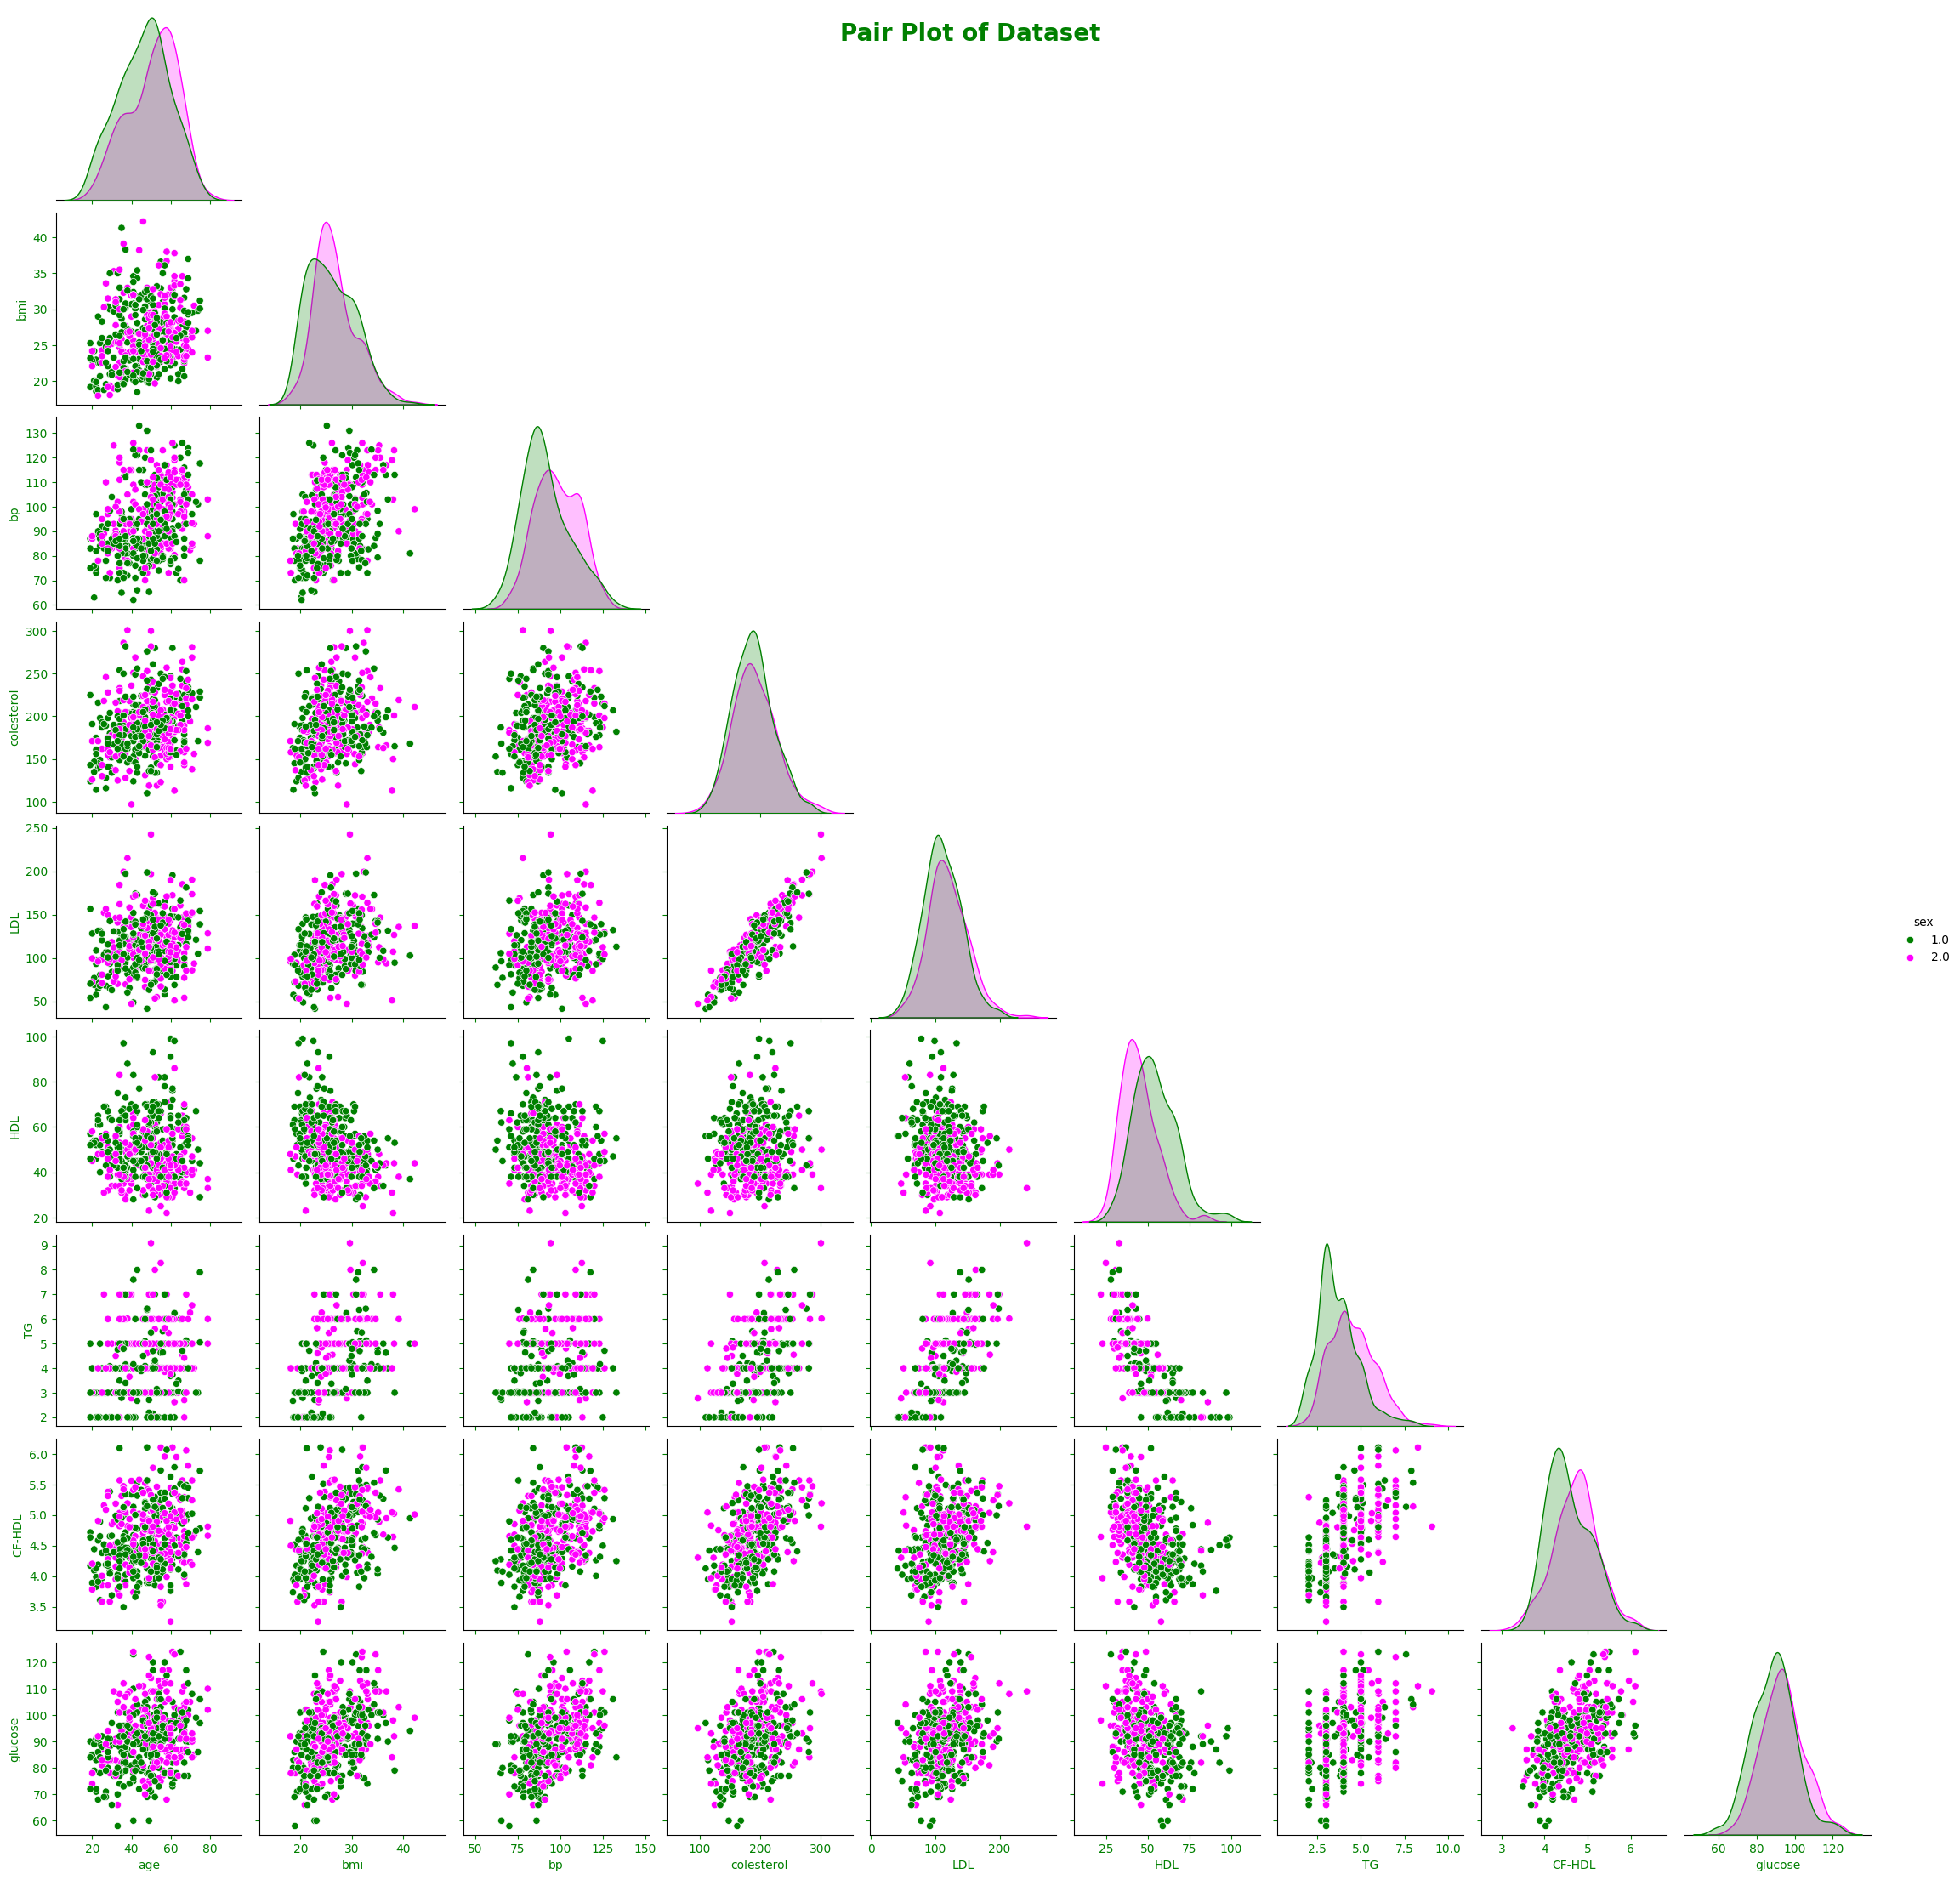

In [38]:
# Lets generate the pair plot which is a scatter plot for each pair of feature present in the dataset
# we are setting a different color for male and female obseravation
sns.pairplot(df, corner=True, hue='sex', palette={1.0: 'green', 2.0: 'fuchsia'})
plt.suptitle('Pair Plot of Dataset', fontsize=20, color="green", fontweight='bold')

for ax in plt.gcf().get_axes():
    ax.tick_params(axis='both', colors='green')
    ax.set_xlabel(ax.get_xlabel(), color='green')
    ax.set_ylabel(ax.get_ylabel(), color='green')

plt.show()

**NOTE**<br>
From the pair plot generated we can see there is a strong linear correlation between LDL and colesterol, while other linear influence can be detected between glucose and CF-HDL, glucose and LDL, glucose and bmi.

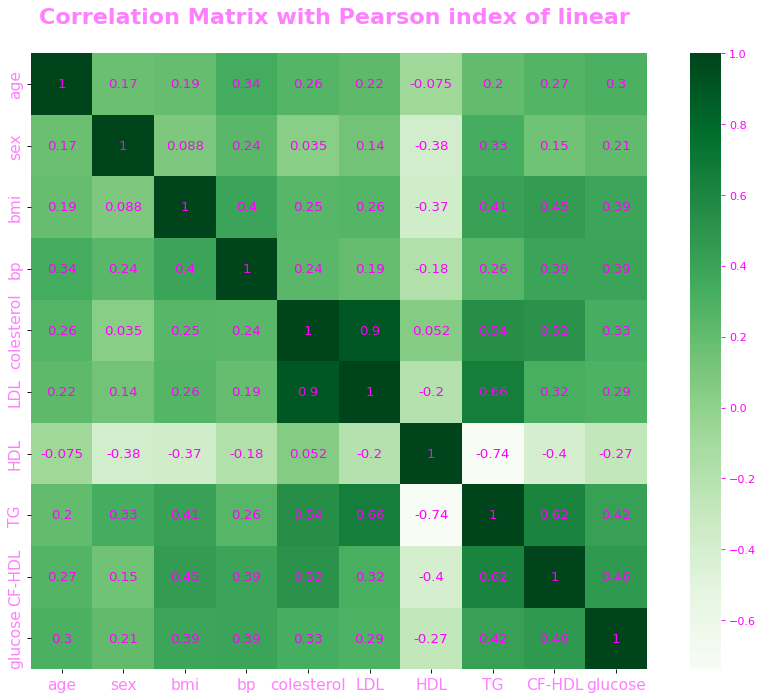

In [57]:
plt.figure(figsize=(14, 10), dpi=80)

light_fuchsia = '#FF80FF'
correlation_matrix = df.corr()

# Now lets quantify the correlation
hm = sns.heatmap(correlation_matrix,
                 cmap='Greens',
                 cbar=True,
                 square=True,
                 yticklabels=df.columns,
                 xticklabels=df.columns,
                 annot=True,
                 annot_kws={'size':12, 'color':'fuchsia'})

# Set the colobar
cbar = hm.collections[0].colorbar
cbar.ax.yaxis.set_tick_params(color='fuchsia', labelcolor='fuchsia')

# Set the labels
hm.set_xticklabels(hm.get_xticklabels(), color=light_fuchsia, fontsize=14)
hm.set_yticklabels(hm.get_yticklabels(), color=light_fuchsia, fontsize=14)

plt.title('Correlation Matrix with Pearson index of linear \n', fontsize=20, color=light_fuchsia, fontweight='bold')
plt.show()

In [59]:
treshold = 0.6

# Lets print the variable that have a correlation above 0.6 in absolute value
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if i != j:
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) >= treshold:
                var1 = correlation_matrix.columns[i]
                var2 = correlation_matrix.columns[j]
                print(f"Variabili correlate: {var1} e {var2}")
                print(f"Valore di correlazione: {corr_value:.2f}")
                print()

Variabili correlate: LDL e colesterol
Valore di correlazione: 0.90

Variabili correlate: TG e LDL
Valore di correlazione: 0.66

Variabili correlate: TG e HDL
Valore di correlazione: -0.74

Variabili correlate: CF-HDL e TG
Valore di correlazione: 0.62

